In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
#read the data
#./dataset/ is a path. Copy and paste the path of the CSV file in your computer to read the data. 
food_consumption = pd.read_csv('food_consumption.csv', index_col=0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [15]:
be_consumption = food_consumption[food_consumption['country'] == "Belgium"]
print("Mean BE = ", be_consumption.consumption.mean())
print("Median BE = ", be_consumption.consumption.median())

Mean BE =  42.13272727272727
Median BE =  12.59


In [17]:
us_consumption = food_consumption[food_consumption['country'] == "USA"]
print("Mean USA = ", us_consumption.consumption.mean())
print("Median USA = ", us_consumption.consumption.median())

Mean USA =  44.650000000000006
Median USA =  14.58


In [18]:
# Work with both countries together
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | 
                              (food_consumption['country'] == 'USA')]

df = pd.DataFrame(
    {'country': be_and_usa.country, 'consumption': be_and_usa.consumption}
)
df.groupby(["country"], ).agg(['mean', 'median'])

consumption       
               mean median
country                   
Belgium   42.132727  12.59
USA       44.650000  14.58

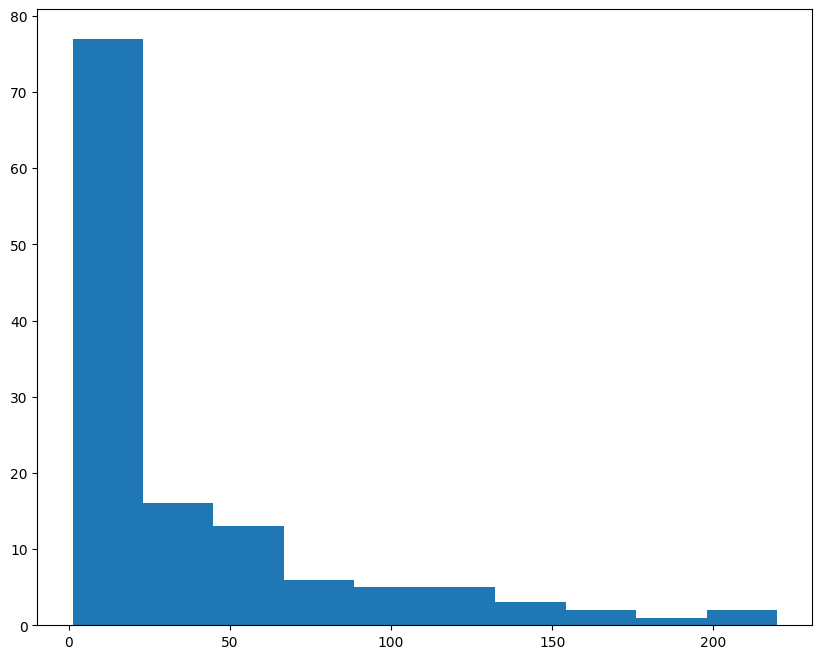

In [19]:
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Q-4)Plot the histogram of co2_emission for rice
plt.hist(rice_consumption.co2_emission)
plt.show()



In [20]:
# Q-5) Calculate mean and median of co2_emission with .agg()

rice_consumption.co2_emission.agg(['mean', 'median'])

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

In [22]:
# Q-6) Calculate the quintiles of co2_emission
print(np.quantile(food_consumption.co2_emission, np.linspace(0, 1, 6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [25]:
# Q-7) Calculate the variance and standard deviation of co2_emission for food_categories

food = food_consumption[["food_category", "co2_emission"]]
food.groupby(["food_category"]).agg(["var", "std"])

co2_emission            
                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570

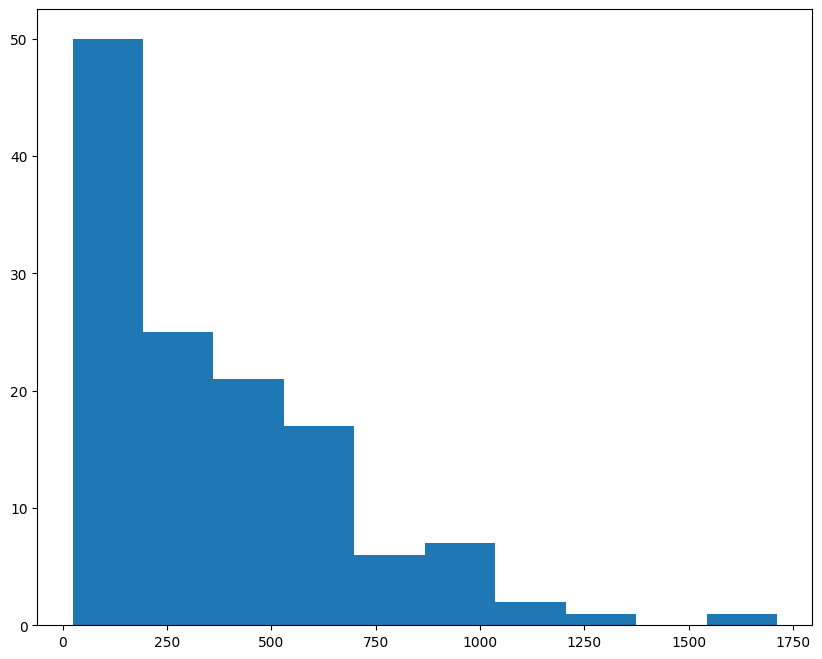

In [26]:
# Q-8) Create histogram of co2_emission for food_category 'beef'

beef = food_consumption[food_consumption["food_category"] == 'beef']
plt.hist(beef["co2_emission"])
plt.show()